## 2. 동일한 데이터로 딥러닝 분류 수행하라. (dense layer 만 사용)

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("./diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 이상치 확인, 산점도 등은 1번에서 이미 진행하였으므로 생략

In [6]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 원 핫 인코딩


In [8]:
Y = pd.get_dummies(y).values

# Numpy 변환

In [9]:
X = X.values

In [10]:
X.shape

(768, 8)

In [11]:
Y
# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [18]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                90        
                                                                 
 dense_5 (Dense)             (None, 8)                 88        
                                                                 
 dense_6 (Dense)             (None, 6)                 54        
                                                                 
 dense_7 (Dense)             (None, 2)                 14        
                                                                 
Total params: 246
Trainable params: 246
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6727 - accuracy: 0.6205 - val_loss: 0.6409 - val_accuracy: 0.6948
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6401 - val_loss: 0.6188 - val_accuracy: 0.6948
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6401 - val_loss: 0.6211 - val_accuracy: 0.6948
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6401 - val_loss: 0.6203 - val_accuracy: 0.6948
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.6401 - val_loss: 0.6430 - val_accuracy: 0.6948
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.6401 - val_loss: 0.6305 - val_accuracy: 0.6948
Epoch 7/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6401 - val_loss: 0.6280 - val_accuracy: 0.6948
Epoch 8/30
20/20 [==

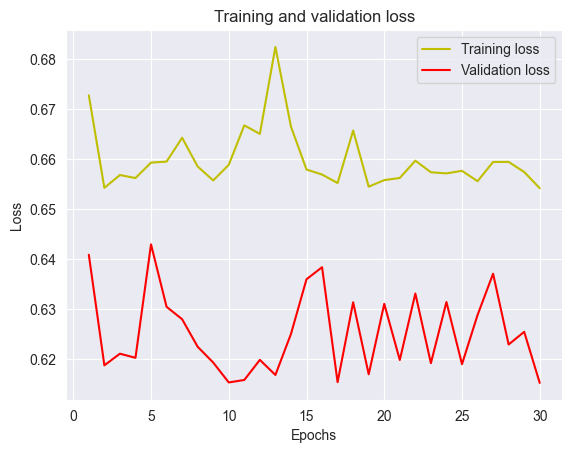

In [23]:
import matplotlib.pyplot as plt

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

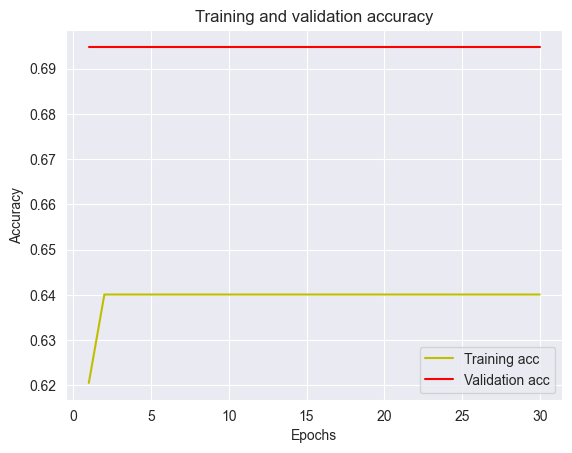

In [24]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       107
           1       0.00      0.00      0.00        47

    accuracy                           0.69       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.48      0.69      0.57       154

[[107   0]
 [ 47   0]]
